In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "DFkai-SB"
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

In [3]:
iris = pd.read_csv('iris.csv', encoding = "Big5")
iris.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler
x = iris[["花萼長度","花萼寬度"]]
y = iris["屬種"]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_test.shape,x_train.shape)

(45, 2) (105, 2)


In [6]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform')
KNC.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [35]:
from sklearn.metrics import confusion_matrix
KNC_confu = confusion_matrix(y_test,KNC.predict(x_test_std))
KNC_confu

array([[16,  0,  0],
       [ 0, 14,  0],
       [ 0,  7,  8]], dtype=int64)

In [36]:
iris["屬種"].drop_duplicates().values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Confusion matrix, without normalization
[[16  0  0]
 [ 0 14  0]
 [ 0  7  8]]


Text(69.88, 0.5, 'True label')

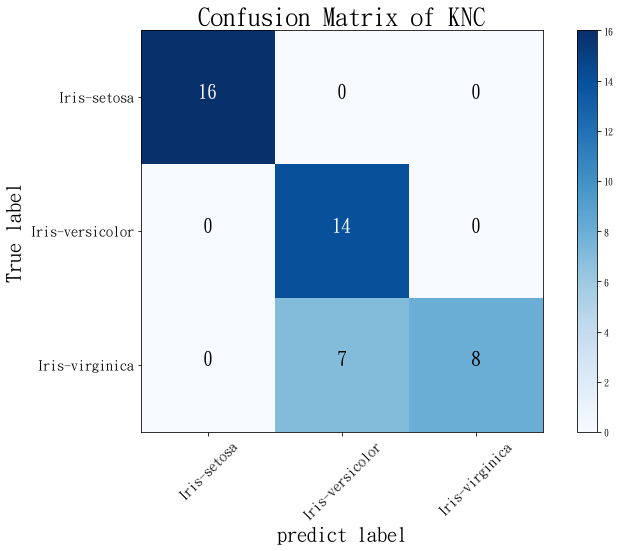

In [37]:
plt.figure(figsize=(10,7))
label = iris["屬種"].drop_duplicates().values
plot_confusion_matrix(KNC_confu,classes = label)
plt.title("Confusion Matrix of KNC",fontsize = 25)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel("predict label",fontsize = 20)
plt.ylabel("True label",fontsize = 20)
# plt.gcf().subplots_adjust(left = 0.2) 修正坐標軸位置避免save fig 裁切到圖片
# 調整其他文字大小請至plot_confusion_matrix 函數中的 plt.text

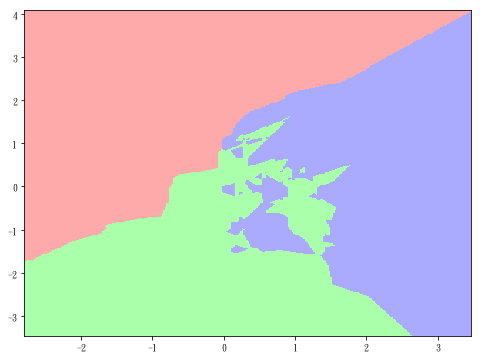

In [38]:
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches

# 轉換為0 1 2方便填色
le = preprocessing.LabelEncoder()
le.fit(label)
y_color = le.transform(y_train)

# 創造colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小 類似像素的概念
# 設定x,y邊界、著色格子
x_min, x_max = x_train_std[:, 0].min() - 1, x_train_std[:, 0].max() + 1
y_min, y_max = x_train_std[:, 1].min() - 1, x_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) # X Y分別產生數列之後 使用meshgrid交乘

# 預測、類別轉成0,1,2
Z = KNC.predict(np.c_[xx.ravel(), yy.ravel()]) #np_c 矩陣左右相加 
Z = le.transform(Z)

# 調整矩陣形狀
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

#背景上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

(-3.4625535472800966, 4.0974464527199101)

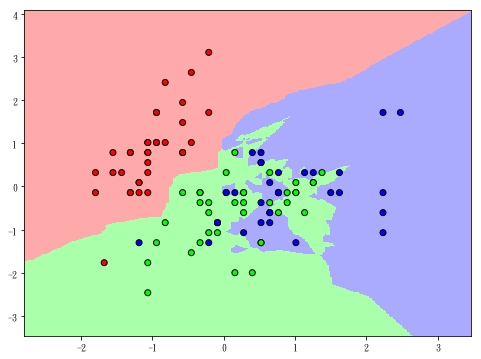

In [39]:
plt.figure(figsize=(8,6))

#背景上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 畫上資料點
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')

# x,y軸邊界調整
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 決策樹

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=5) #可設定gini 或entropy
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
# 決策樹視覺化
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['花萼長度','花萼寬度'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

In [42]:
# 若無法正常顯示中文，可利用以下函式修改.dot裡的字體設定
def tree_set_font(filename, fontname):
    with open("tree.dot", encoding='utf-8') as fin, open('tree2.dot','w', encoding='utf-8') as fout:
        for line in fin:
            if 'node [shape=box]' in line:
                fout.write('node [shape=box,fontname="'+fontname+'"];\n')
            else:
                fout.write(line)

# 修改字體為 DFKai-SB
tree_set_font('tree.dot','DFKai-SB')
# 輸出為 .png
!dot -Tpng tree2.dot -o tree2.png

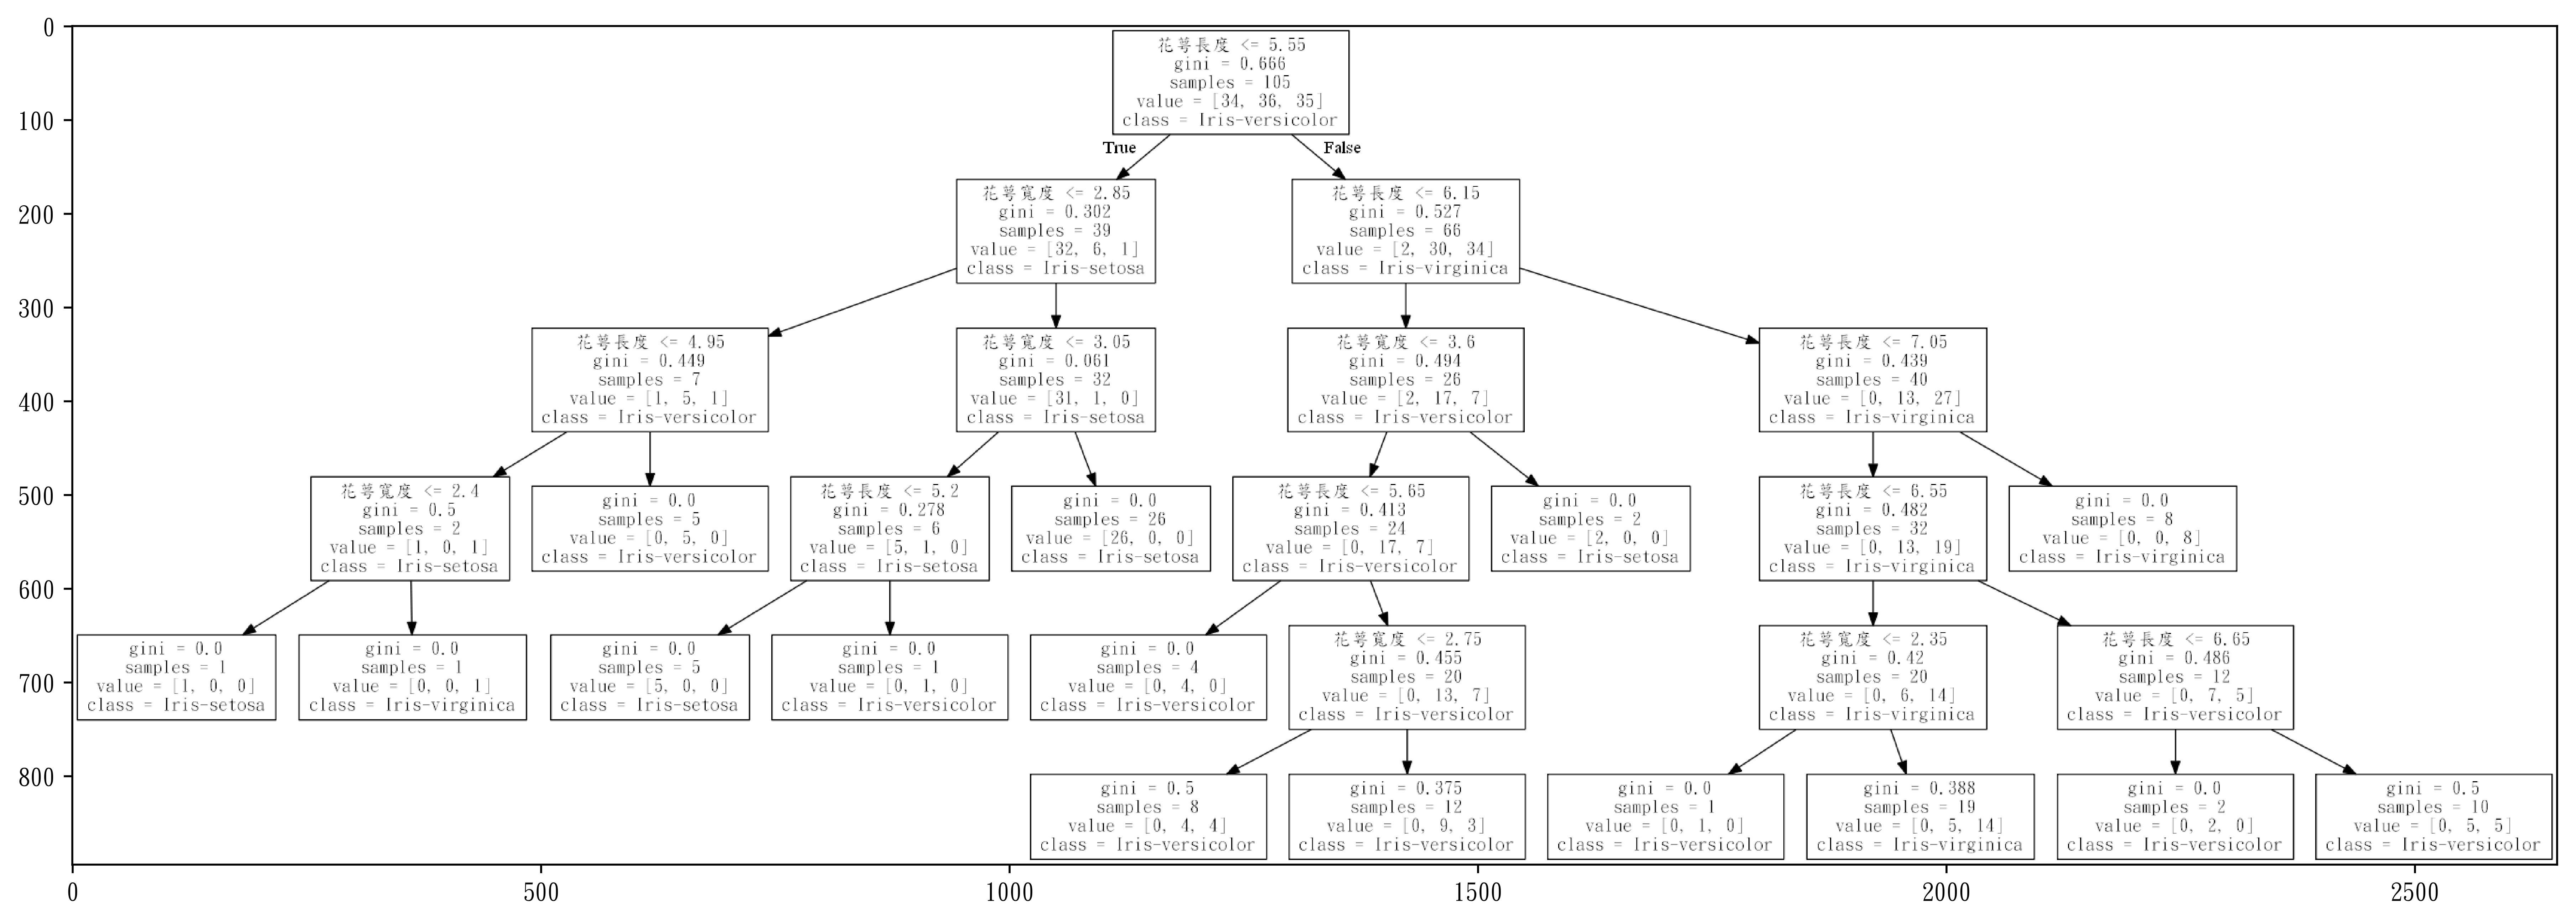

In [43]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree2.png')
fig = plt.figure(figsize=(18,20), dpi=500) #dpi:調整解析度
plt.imshow(img)

In [44]:
from sklearn.metrics import confusion_matrix
Tree_confu = confusion_matrix(y_test,tree.predict(x_test))
Tree_confu

array([[16,  0,  0],
       [ 0, 12,  2],
       [ 0,  8,  7]], dtype=int64)

Confusion matrix, without normalization
[[16  0  0]
 [ 0 12  2]
 [ 0  8  7]]


Text(69.88, 0.5, 'True label')

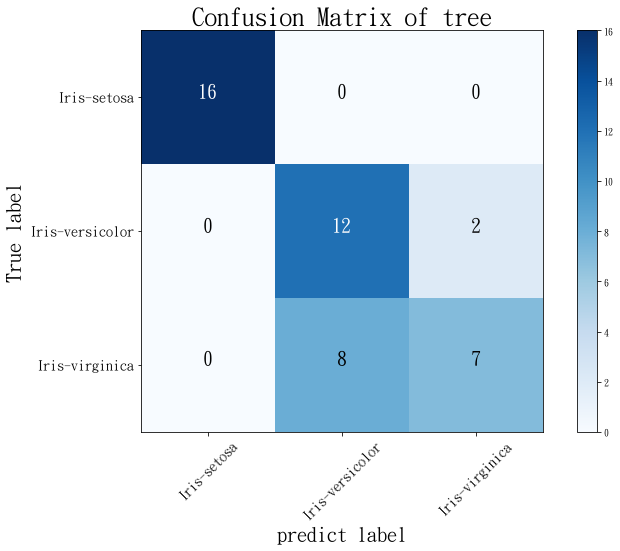

In [45]:
plt.figure(figsize=(10,7))
label = iris["屬種"].drop_duplicates().values
plot_confusion_matrix(Tree_confu,classes = label)
plt.title("Confusion Matrix of tree",fontsize = 25)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel("predict label",fontsize = 20)
plt.ylabel("True label",fontsize = 20)
# plt.gcf().subplots_adjust(left = 0.2) 修正坐標軸位置避免save fig 裁切到圖片
# 調整其他文字大小請至plot_confusion_matrix 函數中的 plt.text

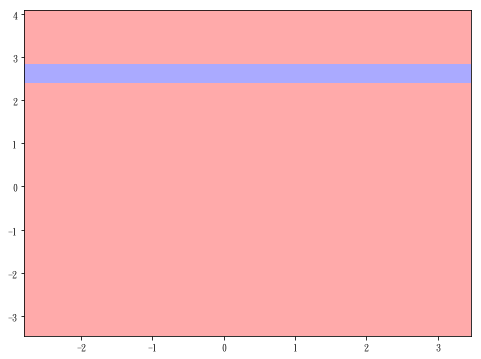

In [46]:
# 轉換為0 1 2方便填色
le = preprocessing.LabelEncoder()
le.fit(label)
y_color = le.transform(y_train)

# 創造colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小 類似像素的概念
# 設定x,y邊界、著色格子
x_min, x_max = x_train_std[:, 0].min() - 1, x_train_std[:, 0].max() + 1
y_min, y_max = x_train_std[:, 1].min() - 1, x_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) # X Y分別產生數列之後 使用meshgrid交乘

# 預測、類別轉成0,1,2
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]) #np_c 矩陣左右相加 
Z = le.transform(Z)

# 調整矩陣形狀
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

#背景上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

(-3.4625535472800966, 4.0974464527199101)

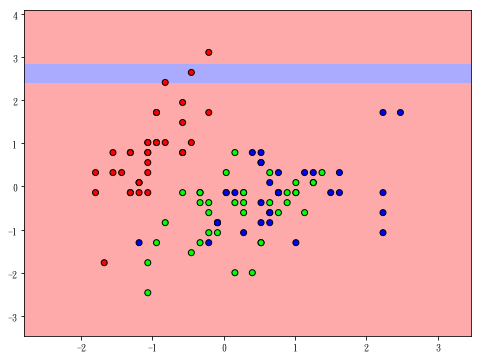

In [47]:
plt.figure(figsize=(8,6))

#背景上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 畫上資料點
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')

# x,y軸邊界調整
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [48]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['花萼長度','花萼寬度'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,花萼長度,0.744537
1,花萼寬度,0.255463


Text(0, 0.5, '特徵重要性')

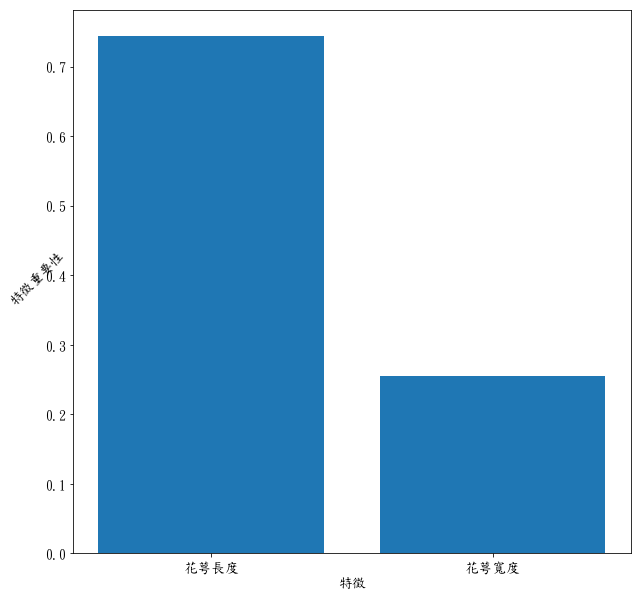

In [49]:
fig = plt.figure(figsize=(10,10))
plt.bar(df["feature"],df["feature_importance"])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('特徵',fontsize = 14)
plt.ylabel("特徵重要性",fontsize = 14,rotation = 45)

# SVM:SVC

In [50]:
from sklearn.svm import SVC

svc_rbf = SVC(C = 0.7,kernel = "rbf")
svc_rbf.fit(x_train_std,y_train)

svc_linear = SVC(C = 1.0,kernel = "linear")
svc_linear.fit(x_train_std,y_train)

svc_poly = SVC(2, kernel = "poly",degree = 3)
svc_poly.fit(x_train_std,y_train)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test, svc_rbf.predict(x_test_std)))
print(metrics.confusion_matrix(y_test, svc_rbf.predict(x_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.75      0.86      0.80        14
 Iris-virginica       0.85      0.73      0.79        15

      micro avg       0.87      0.87      0.87        45
      macro avg       0.87      0.86      0.86        45
   weighted avg       0.87      0.87      0.87        45

[[16  0  0]
 [ 0 12  2]
 [ 0  4 11]]


(-3.4625535472800966, 4.0974464527199101)

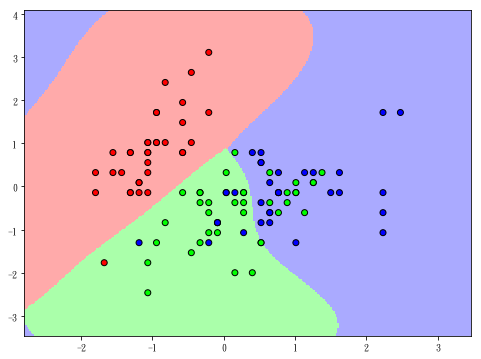

In [52]:
# 轉換為0 1 2方便填色
le = preprocessing.LabelEncoder()
le.fit(label)
y_color = le.transform(y_train)

# 創造colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小 類似像素的概念
# 設定x,y邊界、著色格子
x_min, x_max = x_train_std[:, 0].min() - 1, x_train_std[:, 0].max() + 1
y_min, y_max = x_train_std[:, 1].min() - 1, x_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) # X Y分別產生數列之後 使用meshgrid交乘

# 預測、類別轉成0,1,2
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()]) #np_c 矩陣左右相加 
Z = le.transform(Z)

# 調整矩陣形狀
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

#背景上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 畫上資料點
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')

# x,y軸邊界調整

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [53]:
from sklearn import metrics
print(metrics.classification_report(y_test, svc_linear.predict(x_test_std)))
print(metrics.confusion_matrix(y_test, svc_linear.predict(x_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.72      0.93      0.81        14
 Iris-virginica       0.91      0.67      0.77        15

      micro avg       0.87      0.87      0.87        45
      macro avg       0.88      0.87      0.86        45
   weighted avg       0.88      0.87      0.86        45

[[16  0  0]
 [ 0 13  1]
 [ 0  5 10]]


(-3.4625535472800966, 4.0974464527199101)

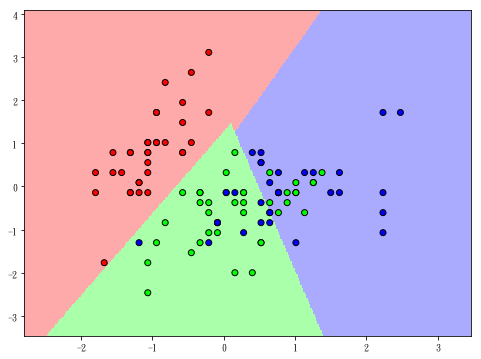

In [54]:
# 轉換為0 1 2方便填色
le = preprocessing.LabelEncoder()
le.fit(label)
y_color = le.transform(y_train)

# 創造colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小 類似像素的概念
# 設定x,y邊界、著色格子
x_min, x_max = x_train_std[:, 0].min() - 1, x_train_std[:, 0].max() + 1
y_min, y_max = x_train_std[:, 1].min() - 1, x_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) # X Y分別產生數列之後 使用meshgrid交乘

# 預測、類別轉成0,1,2
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()]) #np_c 矩陣左右相加 
Z = le.transform(Z)

# 調整矩陣形狀
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

#背景上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 畫上資料點
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')

# x,y軸邊界調整
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-3.4625535472800966, 4.0974464527199101)

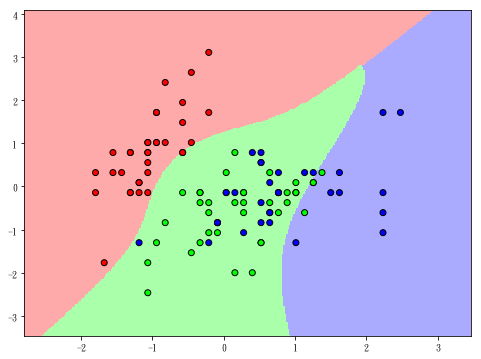

In [55]:
# 轉換為0 1 2方便填色
le = preprocessing.LabelEncoder()
le.fit(label)
y_color = le.transform(y_train)

# 創造colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小 類似像素的概念
# 設定x,y邊界、著色格子
x_min, x_max = x_train_std[:, 0].min() - 1, x_train_std[:, 0].max() + 1
y_min, y_max = x_train_std[:, 1].min() - 1, x_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) # X Y分別產生數列之後 使用meshgrid交乘

# 預測、類別轉成0,1,2
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()]) #np_c 矩陣左右相加 
Z = le.transform(Z)

# 調整矩陣形狀
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

#背景上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 畫上資料點
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')

# x,y軸邊界調整
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [9]:
from sklearn import metrics
print(metrics.classification_report(y_test, svc_poly.predict(x_test_std)))
print(metrics.confusion_matrix(y_test, svc_poly.predict(x_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

NameError: name 'svc_poly' is not defined

# 拓展成三維預測與圖形

In [59]:
x = iris[iris.columns[0:3]]
y = iris["屬種"]
sc = StandardScaler()
sc.fit(x)
x_std = sc.transform(x)

In [60]:
le = preprocessing.LabelEncoder()
le.fit(label)
y_le = le.transform(y)

In [61]:
x_train_std, x_test_std, y_train, y_test = train_test_split(x_std, y_le, test_size = 0.3)
print(x_test_std.shape,x_train_std.shape)

(45, 3) (105, 3)


In [62]:
svc_3D = SVC(C = 0.7,kernel = "rbf",probability= True)
svc_3D.fit(x_train_std,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
#找尋坐標軸範圍
print(x_train_std[:,0].max())
print(x_train_std[:,0].min())
print(x_train_std[:,1].max())
print(x_train_std[:,1].min())
print(x_train_std[:,2].max())
print(x_train_std[:,2].min())


2.24968346124
-1.7488562634
3.11468391068
-2.43898725249
1.78634131465
-1.45500381274


In [64]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-2, 3, 50)
y = np.linspace(-2.5, 3.5, 50) #建立座標軸
z = np.linspace(-2, 2, 50)
X, Y, Z= np.meshgrid(x,y,z) 

In [65]:
X_axis = X.reshape(50*50*50,1)
Y_axis = Y.reshape(50*50*50,1)
Z_axis = Z.reshape(50*50*50,1)
axis_data = np.concatenate((X_axis,Y_axis,Z_axis),axis = 1)
axis_data.shape

(125000, 3)

In [66]:
color = svc_3D.predict(axis_data)

In [67]:
background  = pd.DataFrame(axis_data).join(pd.DataFrame(color,columns = ["answer"]))
background.sample(5)
background_0 = background[background["answer"] == 0]
background_1 = background[background["answer"] == 1]
background_2 = background[background["answer"] == 2]


In [71]:
X0,Y0,Z0 = [[x for x in background_0.iloc[:,0]],
            [y for y in background_0.iloc[:,1]],
            [z for z in background_0.iloc[:,2]]]
X1,Y1,Z1 = [[x for x in background_1.iloc[:,0]],
            [y for y in background_1.iloc[:,1]],
            [z for z in background_1.iloc[:,2]]]
X2,Y2,Z2 = [[x for x in background_2.iloc[:,0]],
            [y for y in background_2.iloc[:,1]],
            [z for z in background_2.iloc[:,2]]]

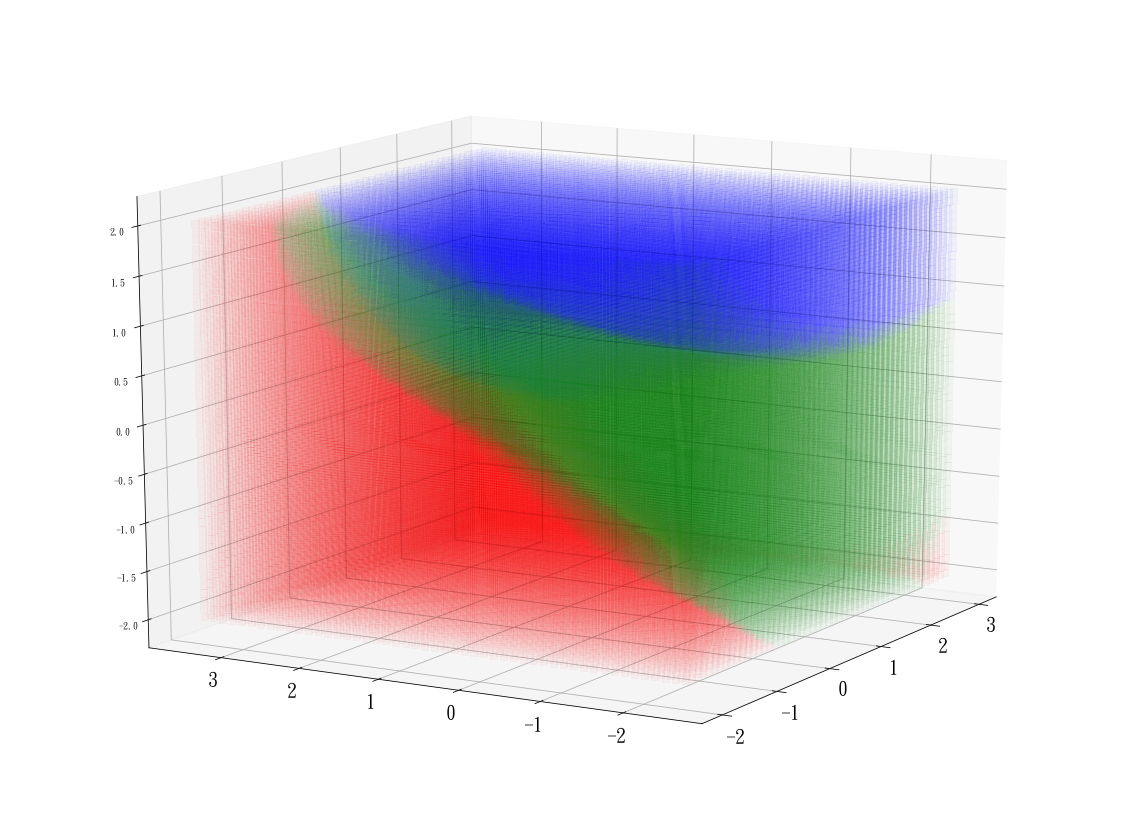

In [79]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection = "3d")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.scatter(X0,Y0,Z0,c = "r",marker = "s",s = 50,alpha = 0.03)
ax.scatter(X1,Y1,Z1,c = "g",marker = "s",s = 50,alpha = 0.03)
ax.scatter(X2,Y2,Z2,c = "b",marker = "s",s = 50,alpha = 0.03)

ax.view_init(15,210)
plt.savefig("SVC_3D.png")
# for i in range(360):
#     ax.view_init(15,i)
#     name = "SVC_3D_"+str(i)+".png"
#     plt.savefig(name)
# progress 96

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_std, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
print(metrics.classification_report(y_test, gnb.predict(x_test_std)))
labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
gnb_confu = metrics.confusion_matrix(y_test, gnb.predict(x_test_std),labels=labels)
print(gnb_confu)


                 precision    recall  f1-score   support

    Iris-setosa       0.94      1.00      0.97        17
Iris-versicolor       0.62      0.83      0.71        12
 Iris-virginica       0.82      0.56      0.67        16

      micro avg       0.80      0.80      0.80        45
      macro avg       0.80      0.80      0.78        45
   weighted avg       0.81      0.80      0.79        45

[[17  0  0]
 [ 0 10  2]
 [ 1  6  9]]


Confusion matrix, without normalization
[[17  0  0]
 [ 0 10  2]
 [ 1  6  9]]


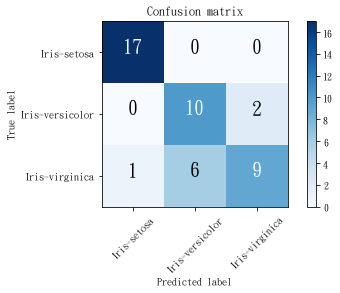

In [15]:
plot_confusion_matrix(gnb_confu,classes=labels)